In [1]:
import pandas as pd
import numpy as np

In [2]:
housing= pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [3]:
housing = housing.replace(['yes'],1)
housing = housing.replace(['no'],0)
housing["furnishingstatus"]= housing["furnishingstatus"].replace(['unfurnished','semi-furnished','furnished'],[0,1,2])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2.0,3,1,0,0,0,1,2.0,1,2
1,12250000,8960,4,4.0,4,1,0,0,0,1,3.0,0,2
2,12250000,9960,3,2.0,2,1,0,1,0,0,2.0,1,1
3,12215000,7500,4,2.0,2,1,0,1,0,1,3.0,1,2
4,11410000,7420,4,1.0,2,1,1,1,0,1,2.0,0,2


In [4]:
#Removing last 000(K) and Will consider it in the result afterwards
Housing_p = housing.price.apply(lambda x : str(x))
Housing_p = Housing_p.apply(lambda x : x[:len(x)-3])
housing.price = Housing_p.apply(lambda x : int(x))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300,7420,4,2.0,3,1,0,0,0,1,2.0,1,2
1,12250,8960,4,4.0,4,1,0,0,0,1,3.0,0,2
2,12250,9960,3,2.0,2,1,0,1,0,0,2.0,1,1
3,12215,7500,4,2.0,2,1,0,1,0,1,3.0,1,2
4,11410,7420,4,1.0,2,1,1,1,0,1,2.0,0,2


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,544.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,540.000000,545.000000,545.000000
mean,4766.719266,5150.541284,2.965138,1.286765,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.694444,0.234862,0.930275
std,1870.437725,2170.141023,0.738064,0.502782,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.864238,0.424302,0.761373
min,1750.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3430.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4340.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5740.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,13300.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         544 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           540 non-null    float64
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 55.5 KB


In [7]:
housing.keys()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>, <AxesSubplot:>]],
      dtype=object)

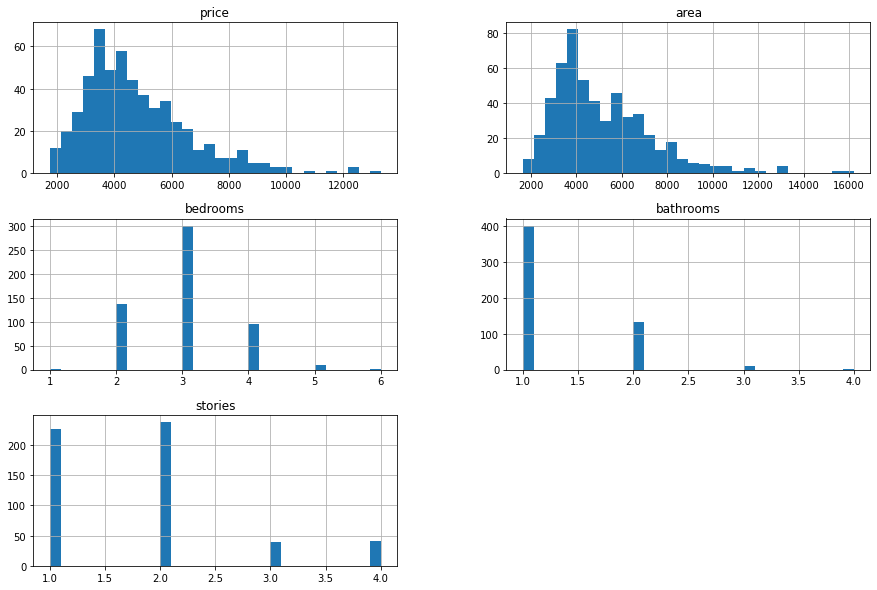

In [8]:
import matplotlib.pyplot as plt
housing_plot=housing[['price', 'area', 'bedrooms', 'bathrooms','stories']]
housing_plot.hist(bins=30,figsize=(15,10))

## train_test_split


In [9]:
# def train_test_split(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_size= int(len(shuffled)*test_ratio)
#     test_indices= shuffled[:test_size] 
#     train_indices= shuffled[test_size:]  
#     return data.iloc[test_indices],data.iloc[train_indices]

# test_data, train_data = train_test_split(housing, 0.3)
# print(len(train_data),len(test_data))

In [10]:
from sklearn.model_selection import train_test_split
train_index,test_index= train_test_split(housing, test_size=0.3,random_state=42)
print(len(train_index),len(test_index))

381 164


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

for train_index, test_index in sss.split(housing, housing["stories"]):
    print("TRAIN:", train_index, "TEST:", test_index)
    strat_train_set, strat_test_set = housing.loc[train_index], housing.loc[test_index]



TRAIN: [ 48 244 451 205 308 105 275 246 250 296 538  73 424 258 420 401 446  69
 530 305 321 384 363 290 130 181  26 447 232 432 243  59 480  49 317 136
  37 186  20 344 466 354  80 459 379 274  44 406 383 399 430  25  10 339
 527 478 529 499 300 125  19 421 169   4 508 390  58 198 426 437 288 117
 513 523 539 498 341 218 407 240 268 306 147 142 484 356 461 319 405 236
 491 462   7 469 133 212 252  31 338  47 216 101 185   8 400 260 123 273
 151 111 434 249 441 310 208 298 358 284 381 391 221  57 175 488 463 247
 394 465 297  62 120 200 435 167 211 129 404  87 413 479   2 157 414 312
 374 336 361 389  45 149  33 148 103 454 377 468 119 412 285 422 373 386
 271 179  96 231 525 362 528 280 517 126 495 188 457 239 215 542  93  18
  98 118 241 511  71 360  46 385 366 144  28 192 115 180  78 315 417 323
  72 490 122 134 255  82 515 107 494 335 116 431 402 489 153 113 165  53
 343 293 237 187 472 328 228 245 229 263 223  27 135 172 262 248 475 304
  74 214 411  56 163 137 393  55 299 458 326

In [12]:
print(strat_test_set.stories.value_counts())
print(strat_train_set.stories.value_counts())

2    72
1    68
3    12
4    12
Name: stories, dtype: int64
2    166
1    159
4     29
3     27
Name: stories, dtype: int64


In [13]:
housing =strat_train_set
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 48 to 471
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             381 non-null    int64  
 1   area              381 non-null    int64  
 2   bedrooms          381 non-null    int64  
 3   bathrooms         380 non-null    float64
 4   stories           381 non-null    int64  
 5   mainroad          381 non-null    int64  
 6   guestroom         381 non-null    int64  
 7   basement          381 non-null    int64  
 8   hotwaterheating   381 non-null    int64  
 9   airconditioning   381 non-null    int64  
 10  parking           377 non-null    float64
 11  prefarea          381 non-null    int64  
 12  furnishingstatus  381 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 41.7 KB


In [14]:
corr_matrix=housing.corr()
corr_matrix.price.sort_values(ascending=False)

price               1.000000
area                0.553525
bathrooms           0.458822
airconditioning     0.437236
stories             0.407891
bedrooms            0.362657
parking             0.332383
prefarea            0.305082
mainroad            0.301810
furnishingstatus    0.290850
guestroom           0.277788
basement            0.209925
hotwaterheating     0.072425
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='stories', ylabel='price'>,
        <AxesSubplot:xlabel='parking', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='area'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='area'>,
        <AxesSubplot:xlabel='stories', ylabel='area'>,
        <AxesSubplot:xlabel='parking', ylabel='area'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='area', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='stories', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='parking', ylab

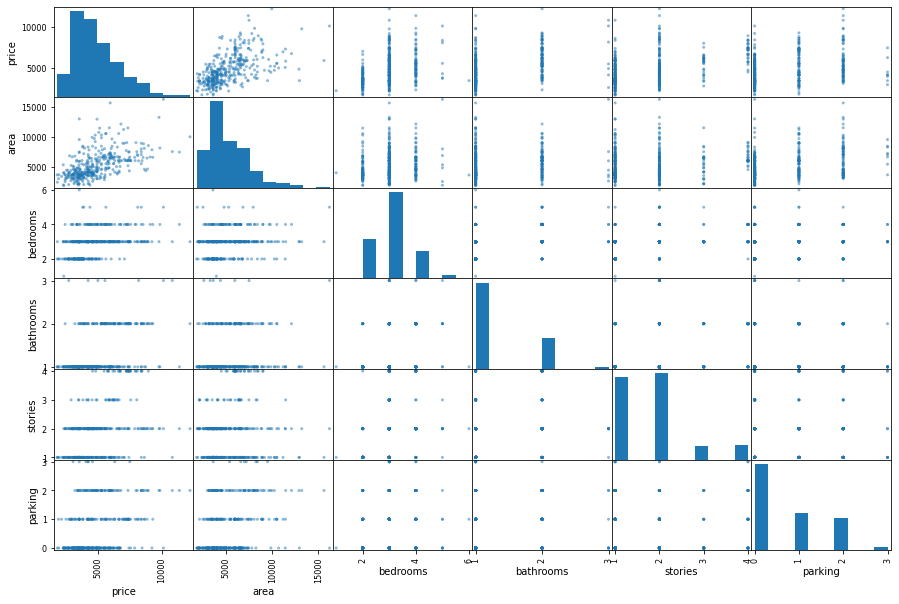

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scatter_matrix(housing[attributes],figsize=[15,10])

<AxesSubplot:xlabel='price', ylabel='area'>

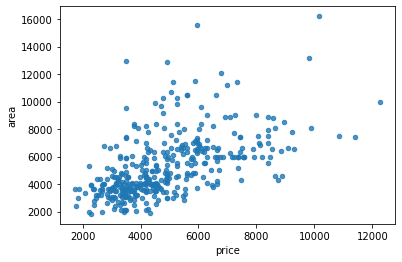

In [16]:
housing.plot(kind="scatter",x="price",y="area",alpha=0.8)

<AxesSubplot:>

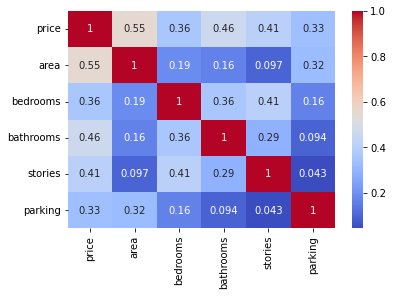

In [17]:
import seaborn as sn
sn.heatmap(housing[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


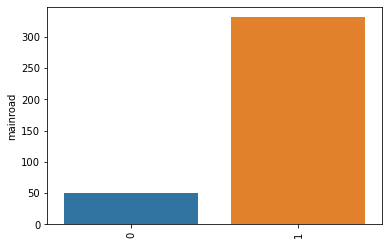

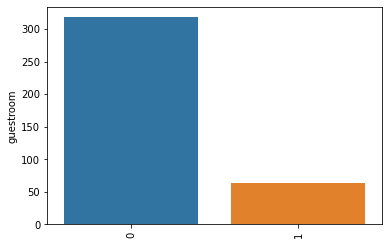

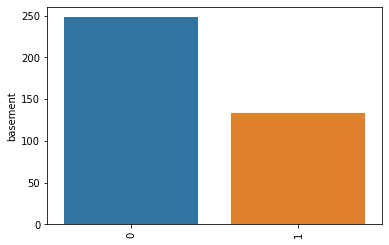

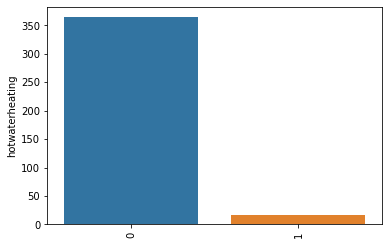

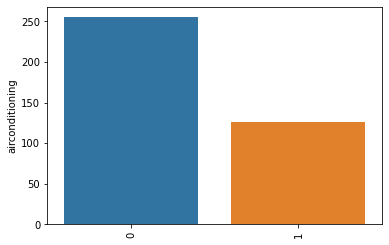

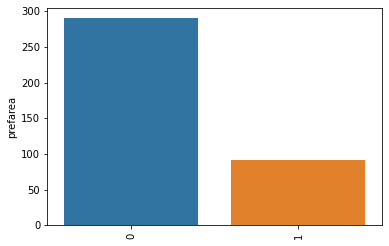

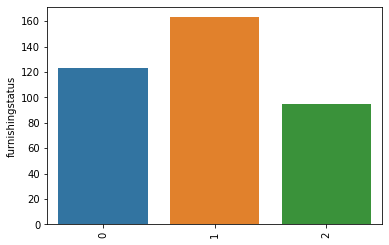

In [18]:
cat_df=housing[['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
for i in cat_df.columns:
    cat_vc=cat_df[i].value_counts()
    sn.barplot(x=cat_vc.index, y=cat_vc)
    plt.xticks(rotation=90)
    plt.show()

In [19]:
df_pivots=housing[[ 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 
             'airconditioning','parking', 'prefarea', 'furnishingstatus','price']]

for i in df_pivots.columns[:-1]:
    print('\033[1m  {} x price \033[0m'.format(i) )
    print(pd.pivot_table(df_pivots, index= i, values="price").sort_values("price",ascending=False))
    print('\n')

  area x price 
         price
area          
9960   12250.0
7420   11410.0
7500   10850.0
16200  10150.0
13200   9800.0
...        ...
3360    2100.0
3649    1890.0
2990    1855.0
2400    1767.0
3620    1750.0

[224 rows x 1 columns]


  bedrooms x price 
                price
bedrooms             
5         6319.000000
4         5516.462687
3         5142.485714
2         3649.063158
6         3500.000000
1         2275.000000


  bathrooms x price 
                 price
bathrooms             
3.0        6650.000000
2.0        6162.948980
1.0        4327.672727


  stories x price 
               price
stories             
4        7010.448276
3        5458.296296
2        4967.933735
1        4219.119497


  mainroad x price 
                price
mainroad             
1         5055.640483
0         3455.540000


  guestroom x price 
                 price
guestroom             
1          5962.888889
0          4624.314465


  basement x price 
                price
basement     

In [20]:
# #Handling Missing attributes By imputing median
# from sklearn.impute import SimpleImputer
# imputer= SimpleImputer(strategy="median")
# handleMissingValue=['MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens','JoggingTrack', 'IndoorGames', 'ShoppingMall', 'ATM', 'ClubHouse',
# 'School', '24X7Security', 'CarParking', 'Hospital', 'Gasconnection',"Children'splayarea", 'LiftAvailable', 'VaastuCompliant']
# imputer.fit(housing[handleMissingValue])
# X= imputer.transform(housing[handleMissingValue])
# housing_tr=pd.DataFrame(X,columns=handleMissingValue)
# housing_tr.info()

In [21]:
housing =strat_train_set.drop("price",axis=1)
housing_labels=strat_train_set["price"]

In [22]:
#Creating a pipeline
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe =Pipeline([('imputer',SimpleImputer(strategy="median")),
                ('scaler',StandardScaler())])

housing_tr = pipe.fit_transform(housing)
housing_tr

array([[-0.42676862,  0.0467959 ,  1.4284685 , ...,  0.35472182,
        -0.56017239, -1.23067506],
       [ 0.02229973,  0.0467959 , -0.59475268, ..., -0.81035587,
         1.78516475,  0.09761729],
       [ 0.65187595, -1.32468407, -0.59475268, ..., -0.81035587,
        -0.56017239,  0.09761729],
       ...,
       [-1.36232769,  0.0467959 , -0.59475268, ..., -0.81035587,
        -0.56017239, -1.23067506],
       [ 0.82886171,  0.0467959 , -0.59475268, ..., -0.81035587,
        -0.56017239,  1.42590963],
       [-0.66891332,  0.0467959 , -0.59475268, ..., -0.81035587,
        -0.56017239, -1.23067506]])

## Selecting a desired model



In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
#model= LinearRegression()
#model= RandomForestRegressor()
#model = KMeans(n_clusters=2, random_state=0)
#model= LogisticRegression()
model= DecisionTreeRegressor()


model.fit(housing_tr,housing_labels)

DecisionTreeRegressor()

In [24]:
#ft = fake test data from the training data itself (Since Not touching Actual test data for now)
ft_data = housing.iloc[:9]
ft_labels = housing_labels.iloc[:9]
tr_data = pipe.fit_transform(ft_data)


In [25]:
print("Predicted labels")
model.predict(tr_data) 

Predicted labels


array([4060., 5523., 5600., 4760., 4655., 6720., 3395., 3780., 3780.])

In [26]:
print("Actual labels")
list(ft_labels)

Actual labels


[7455, 4550, 3150, 4900, 4165, 6160, 4319, 4550, 4515]

## Evaluating The Model

In [27]:
from sklearn.metrics import mean_squared_error
house_prediction= model.predict(housing_tr)
mse = mean_squared_error(housing_labels,house_prediction)
rmse=np.sqrt(mse)
rmse

44.65585817439117

## Better evaluation technique

In [28]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=(-scores)
rmse_scores

array([2631177.5       , 3901539.39473684, 2336096.92105263,
       2040194.86842105, 2994217.21052632, 1954904.        ,
       1923765.39473684, 2685822.81578947, 1698673.47368421,
       2245043.98026316])

In [29]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())
print_scores(rmse_scores)

Scores: [2631177.5        3901539.39473684 2336096.92105263 2040194.86842105
 2994217.21052632 1954904.         1923765.39473684 2685822.81578947
 1698673.47368421 2245043.98026316]
Mean: 2441143.5559210526
Std: 616461.5067519345


In [30]:
from joblib import dump, load
dump(model, 'housePricePredictor.joblib') 

['housePricePredictor.joblib']

## Testing 

In [31]:
X_test = strat_test_set.drop("price",axis=1)
y_test = strat_test_set["price"]
X_test_tr = pipe.transform(X_test)
model_prediction= model.predict(X_test_tr)
final_mse= mean_squared_error(y_test,model_prediction)
final_rmse= np.sqrt(final_mse)

In [32]:
final_rmse

1923.3425090222997

In [34]:
tr_data[0]

array([-0.35912478,  0.53452248,  2.82842712,  0.1118034 ,  0.        ,
       -0.35355339,  1.11803399,  0.        , -0.53452248,  0.81110711,
       -0.53452248, -1.56892908])